# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
datapath = Path("nba.csv")

# Load Data

In [3]:
nba = pd.read_csv(datapath, sep = ",")
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


# Exploratory Analysis

In [4]:
# We going to chech what types of data we have in our dataset
nba.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [5]:
# Verify how many NaN values exist inside the dataset
nba.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
# We must manage these NaN values
nba.dropna(subset=['Name'], inplace=True) # We will delete a player who has no name, team, number, etc. We use Name but it will spread the elimination

nba.fillna({'College' : 'Unknown'}, inplace=True)

min_salary = nba['Salary'].min()
nba.fillna({'Salary' : min_salary}, inplace=True)

In [8]:
# We in Europe, so we will convert the height to centimeters
nba[['Feet', 'Inches']] = nba['Height'].str.split("-", expand=True).astype(int)
nba['Height'] = (nba['Feet'] * 30.48) + (nba['Inches'] * 2.54)

# We will rename the column to make it more clear
nba.rename(columns={'Height' : 'Height (cm)'}, inplace=True)

In [9]:
# We also change the meauserement of the weight to kilograms
nba['Weight (KG)'] = (nba['Weight'] / 2.205).round(2)

In [45]:
nba['Position'].replace({'PG' : 'Base', 'SF' : 'Alero', 'SG' : 'Escolta', 'PF' : 'Ala-Pivot', 'C' : 'Pivot'}, inplace=True)

In [10]:
# We dont need the columns Feet and Inches anymore
nba.drop(columns = ['Feet', 'Inches', 'Weight'], inplace=True)

In [11]:
# Just to make it more readable, we will round the height to 2 decimal places
nba['Height (cm)'] = nba['Height (cm)'].apply(lambda x: round(x, 2))

In [46]:
nba.head()

,Name,Team,Number,Position,Age,Height (cm),College,Salary,Weight (KG)
0,Avery Bradley,Boston Celtics,0.0,Base,25.0,187.96,Texas,7730337.0,81.63
1,Jae Crowder,Boston Celtics,99.0,Alero,25.0,198.12,Marquette,6796117.0,106.58
2,John Holland,Boston Celtics,30.0,Escolta,27.0,195.58,Boston University,30888.0,92.97
3,R.J. Hunter,Boston Celtics,28.0,Escolta,22.0,195.58,Georgia State,1148640.0,83.90
4,Jonas Jerebko,Boston Celtics,8.0,Ala-Pivot,29.0,208.28,Unknown,5000000.0,104.76


In [12]:
# In order to a better understanding, we going to create a stadistic summary for the numeric variables
age_mean = nba['Age'].mean()
age_median = nba['Age'].median()
age_std = nba['Age'].std()

print(f"Agen Mean: {age_mean}", "\n")
print(f"Age_Median: {age_median}", "\n")
print(f"Age_Standard Desviation: {age_std}", "\n")

Agen Mean: 26.938730853391686 

Age_Median: 26.0 

Age_Standard Desviation: 4.404016424405833 



In [13]:
# Now we going to do the same we did with Age, but now with the Salary variable
salary_mean = nba['Salary'].mean()
salary_median = nba['Salary'].median()
salary_std = nba['Salary'].std()

print(f"Salary_mean: {salary_mean}", "\n")
print(f"Salary_median: {salary_median}", "\n")
print(f"Salary_Standard Desviation: {salary_std}", "\n")

Salary_mean: 4726864.067833698 

Salary_median: 2658240.0 

Salary_Standard Desviation: 5218272.737017504 



In [14]:
# Now for height and weight (we alredy transformed height to float)
height_mean = nba['Height (cm)'].mean()
height_median = nba['Height (cm)'].median()
height_std = nba['Height (cm)'].std()

print(f"Height_mean: {height_mean}", "\n")
print(f"Height_median: {height_median}", "\n")
print(f"Height_Standard Desviation: {height_std}", "\n")

weight_mean = nba['Weight (KG)'].mean()
weight_median = nba['Weight (KG)'].median()
weight_std = nba['Weight (KG)'].std()

print(f"Weight_mean: {weight_mean}", "\n")
print(f"Weight_median: {weight_median}", "\n")
print(f"Weight_Standard Desviation: {weight_std}", "\n")

Height_mean: 201.14354485776806 

Height_median: 203.2 

Height_Standard Desviation: 8.71840393827837 

Weight_mean: 100.4639387308534 

Weight_median: 99.77 

Weight_Standard Desviation: 11.958233575317546 



In [15]:
# Once we load, clean and transform the data, we can do an statistic summary based on another way:
nba[['Age', 'Salary', 'Height (cm)', 'Weight (KG)']].describe().apply(lambda x: round(x, 2))

,Age,Salary,Height (cm),Weight (KG)
count,457.00,457.00,457.00,457.00
mean,26.94,4726864.07,201.14,100.46
std,4.40,5218272.74,8.72,11.96
min,19.00,30888.00,175.26,73.02
25%,24.00,1000000.00,195.58,90.70
50%,26.00,2658240.00,203.20,99.77
75%,30.00,6331404.00,208.28,108.84
max,40.00,25000000.00,220.98,139.23


In [16]:
# We going to do a top 10 of the players with the highest salary
nba[['Name', 'Salary']].sort_values(by='Salary', ascending=False).head(10)

,Name,Salary
109,Kobe Bryant,25000000.0
169,LeBron James,22970500.0
33,Carmelo Anthony,22875000.0
251,Dwight Howard,22359364.0
339,Chris Bosh,22192730.0
100,Chris Paul,21468695.0
414,Kevin Durant,20158622.0
164,Derrick Rose,20093064.0
349,Dwyane Wade,20000000.0
98,DeAndre Jordan,19689000.0


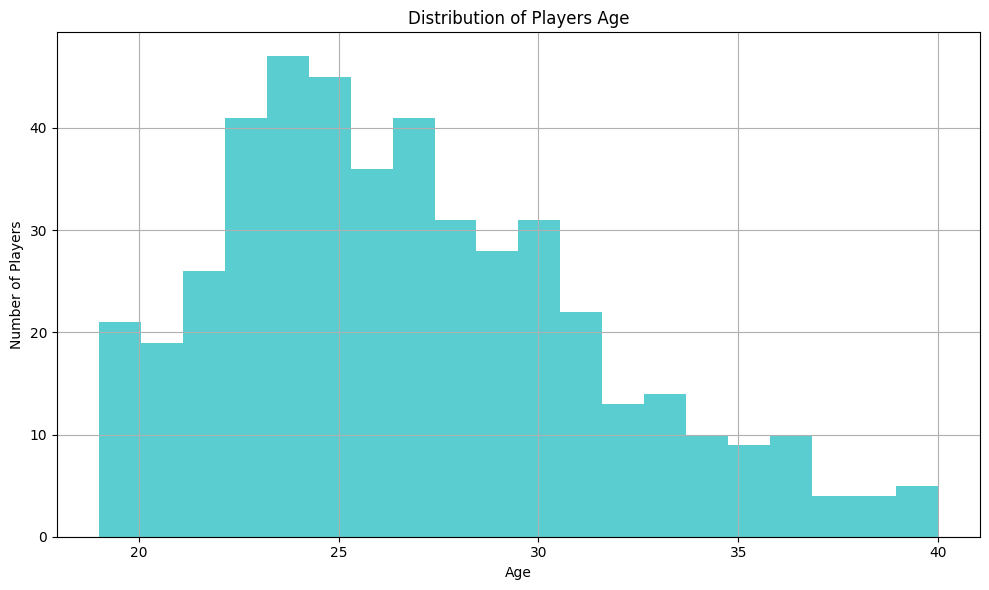

In [32]:
# We going to plot the players based on their ages
plt.figure(figsize=(10, 6))
plt.hist(nba['Age'], bins=20, color='#14b8bd', alpha=0.7)
plt.title('Distribution of Players Age')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.grid(True)
plt.tight_layout()
plt.show()

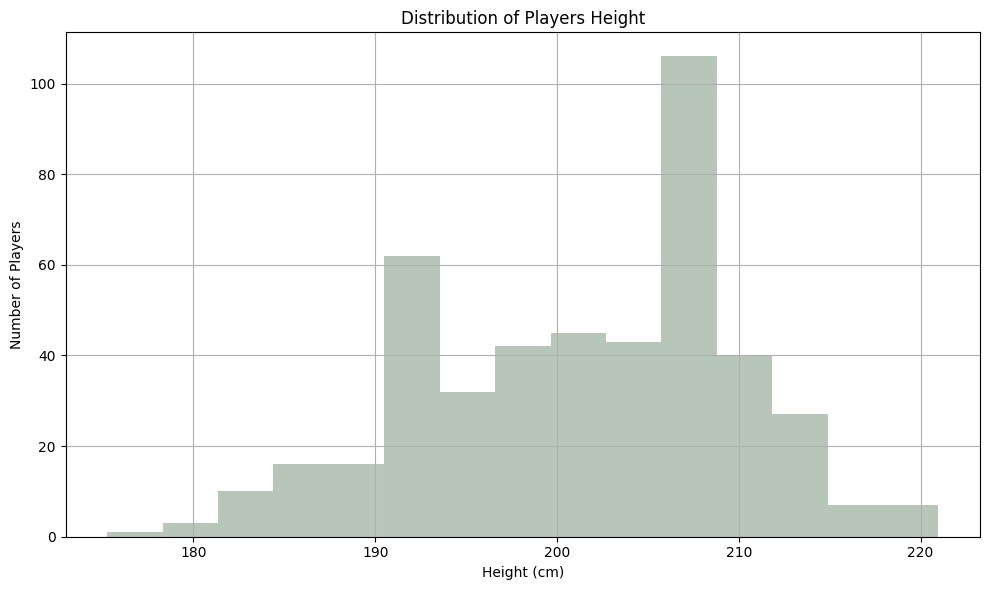

In [33]:
# We doing the same with the Height variable
plt.figure(figsize=(10, 6))
nba['Height (cm)'].hist(bins=15, color='#9bad9c', alpha=0.7)
plt.title('Distribution of Players Height')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Players')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Salary')

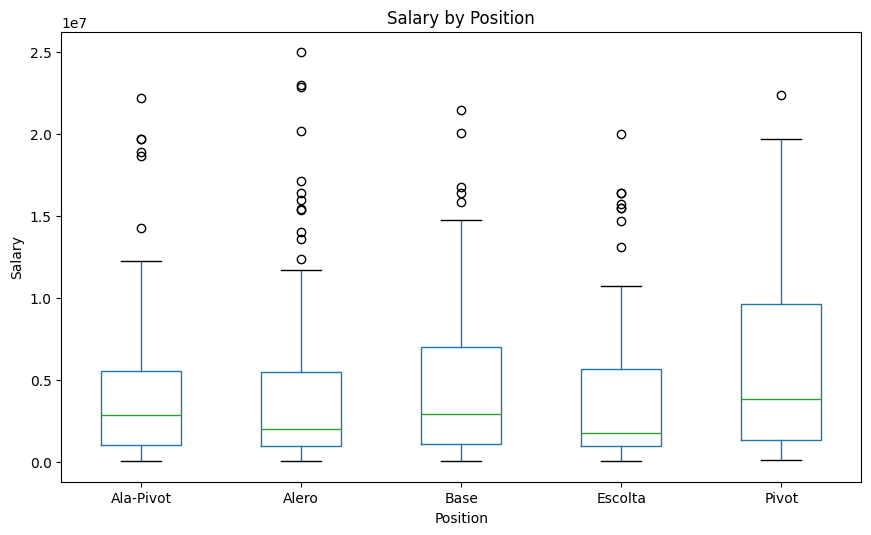

In [50]:
# Now we going to make a boxplot of the salary per position in order to see how the salary is distributed and if there are outliers
nba.boxplot(column='Salary', by='Position', figsize=(10, 6), grid=False)
plt.title('Salary by Position')
plt.suptitle('')
plt.xlabel('Position')
plt.ylabel('Salary')

Text(0, 0.5, 'Number of Players')

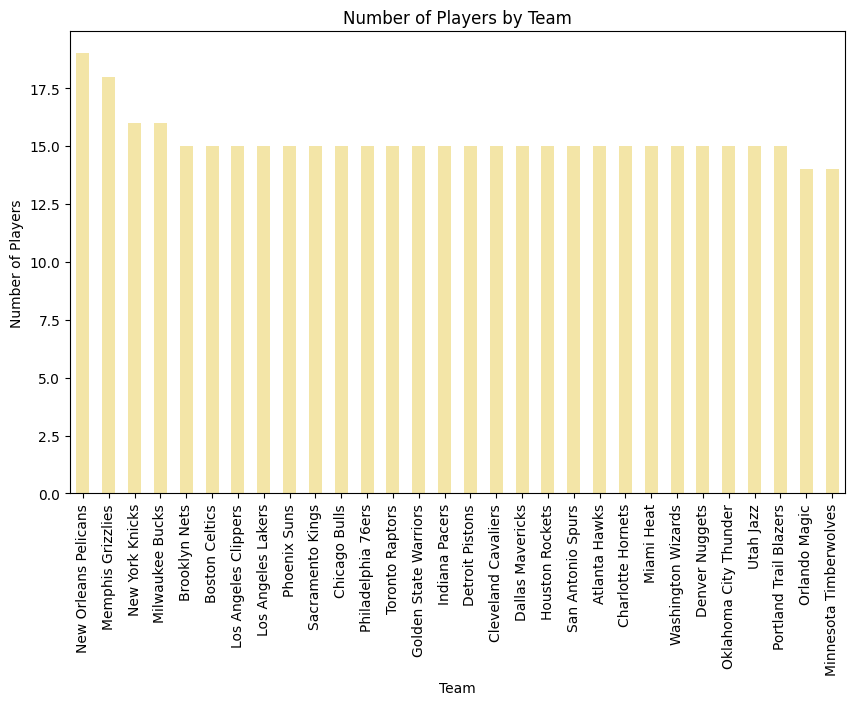

In [51]:
# We doing a bar plot based on the number of players by team
nba['Team'].value_counts().plot(kind='bar', figsize=(10, 6), color='#eeda82', alpha=0.7)
plt.title('Number of Players by Team')
plt.xlabel('Team')
plt.ylabel('Number of Players')

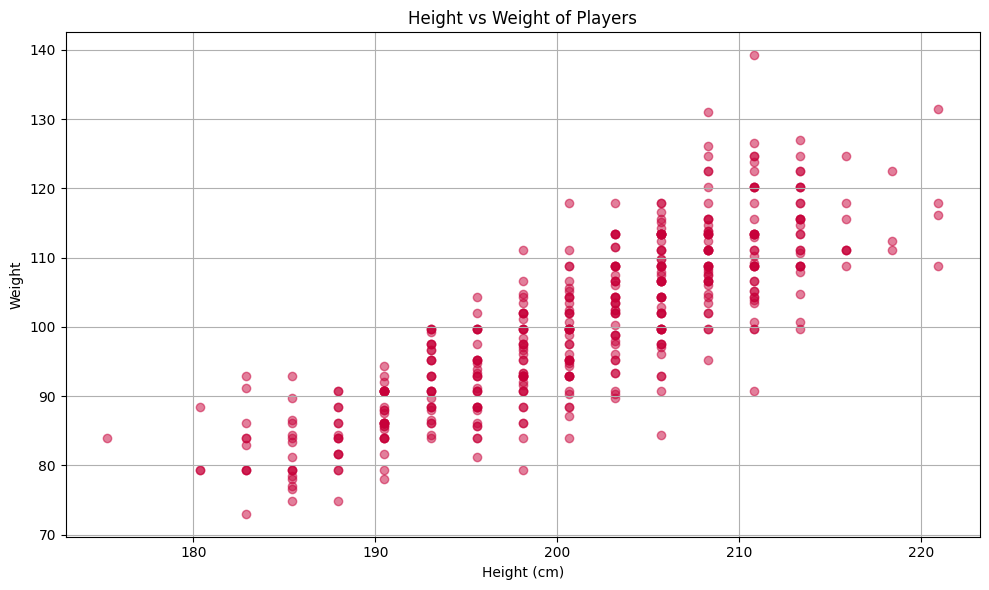

In [52]:
# We make an scatter plot of the height vs weight
plt.figure(figsize=(10, 6))
plt.scatter(nba['Height (cm)'], nba['Weight (KG)'], alpha=0.5, color='#C70039')
plt.title('Height vs Weight of Players')
plt.xlabel('Height (cm)')
plt.ylabel('Weight')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Salary (Median)')

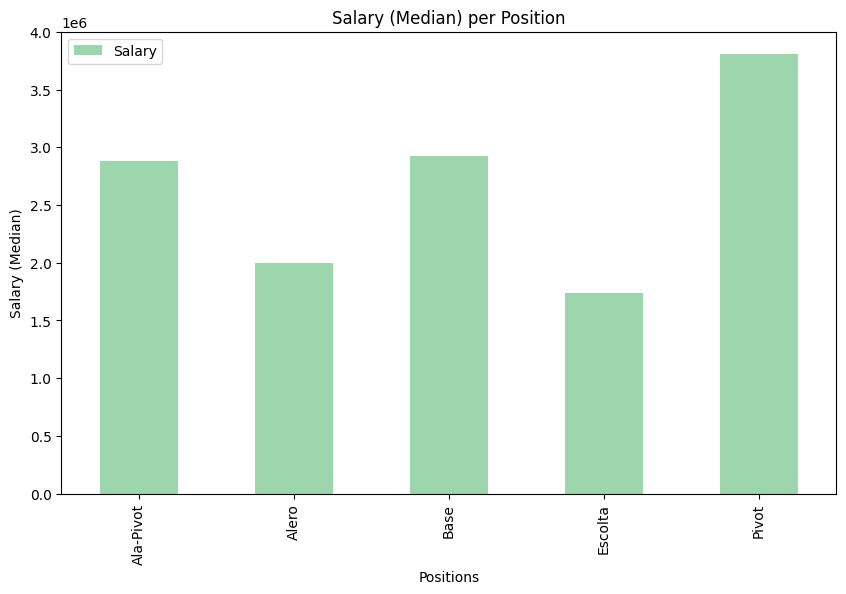

In [59]:
# Here we can see a bar plot based on salary (median) per position
ps = nba.groupby('Position').agg({
    'Salary' : 'median'
}
)

ps.plot(kind='bar', color = '#9DD6AD', figsize=(10,6))
plt.title("Salary (Median) per Position")
plt.xlabel("Positions")
plt.ylabel("Salary (Median)")

<Axes: xlabel='Position'>

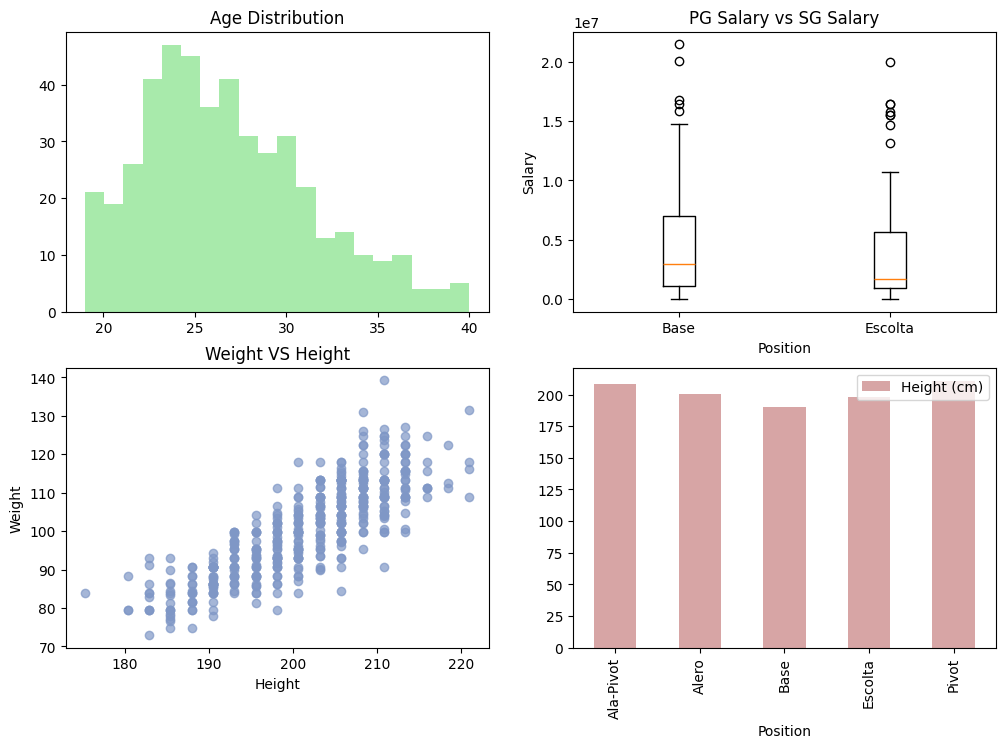

In [80]:
# A small dashboard based on different metrics

fig, axes = plt.subplots(2,2, figsize=(12,8))

# First Graphic
axes[0,0].hist(nba['Age'], color = "#83e288", alpha = 0.7, bins = 20)
axes[0,0].set_title("Age Distribution")

salary_base = nba[nba['Position'] == "Base"]['Salary']
salary_escolta = nba[nba['Position'] == "Escolta"]['Salary']
axes[0,1].boxplot([salary_base, salary_escolta], tick_labels = ['Base', 'Escolta'])
axes[0,1].set_title("PG Salary vs SG Salary")
axes[0,1].set_xlabel("Position")
axes[0,1].set_ylabel("Salary")

axes[1,0].scatter(nba['Height (cm)'], nba['Weight (KG)'], color = "#7f97c6", alpha = 0.7)
axes[1,0].set_title("Weight VS Height")
axes[1,0].set_xlabel("Height")
axes[1,0].set_ylabel("Weight")

hm = nba.groupby('Position').agg({'Height (cm)' : 'median'})
hm.plot(ax=axes[1,1], kind="bar", color="#c67f7f", alpha = 0.7)